In [5]:
import pandas as pd

# Load data
file_path = './MagellanData.xlsx'
xls = pd.ExcelFile(file_path)
fmagx_df = xls.parse('FMAGX')
gacs_df = xls.parse('GACs')

# Clean FMAGX
fmagx_df.replace(-9999, pd.NA, inplace=True)
fmagx_df_long = fmagx_df.melt(id_vars=['yyyy'], var_name='month', value_name='return')
fmagx_df_long['month'] = fmagx_df_long['month'].str.extract('(\d+)').astype(int)
fmagx_df_long['date'] = pd.to_datetime(fmagx_df_long['yyyy'].astype(str) + '-' + fmagx_df_long['month'].astype(str))
fmagx_df_long = fmagx_df_long.drop(columns=['yyyy', 'month']).set_index('date').sort_index()
fmagx_df_long = fmagx_df_long[(fmagx_df_long['return'] > -100) & (fmagx_df_long['return'] < 100)]  # remove extreme outliers

# Clean GACs
gacs_df = gacs_df.rename(columns={'Month': 'date'})
gacs_df['date'] = pd.to_datetime(gacs_df['date'])
gacs_df.set_index('date', inplace=True)

# Export cleaned data
fmagx_df_long.to_csv('Cleaned_FMAGX.csv')
gacs_df.to_csv('Cleaned_GACs.csv')


In [31]:
import pandas as pd

# Load the CSV file (adjust the file path as needed)
magellan_data = pd.read_csv('Cleaned_FMAGX.csv')
gac_data = pd.read_csv('Cleaned_GACs.csv')

# Display the data types of each column in the Magellan data
print("Data types for Magellan Fund (FMAGX) data:")
print(magellan_data.dtypes)
print("\n")

# Display the data types of each column in the GACs data
print("Data types for General Asset Classes (GACs) data:")
print(gac_data.dtypes)


Data types for Magellan Fund (FMAGX) data:
date       object
return    float64
dtype: object


Data types for General Asset Classes (GACs) data:
date          object
Gac 1         object
Gac 2         object
Gac 3         object
Gac 4         object
Gac 5         object
Gac 6         object
Gac 7         object
Gac 8         object
Gac 9         object
Gac 10        object
Gac 11        object
Gac 12        object
Gac 13        object
Gac 14        object
Gac 15        object
Core3         object
Inflation    float64
dtype: object


Columns in DataFrame:
Index(['date', 'Gac 1', 'Gac 2', 'Gac 3', 'Gac 4', 'Gac 5', 'Gac 6', 'Gac 7',
       'Gac 8', 'Gac 9', 'Gac 10', 'Gac 11', 'Gac 12', 'Gac 13', 'Gac 14',
       'Gac 15', 'Core3', 'Inflation'],
      dtype='object')

DataFrame dtypes after conversion:
Gac 1        float64
Gac 2        float64
Gac 3        float64
Gac 4        float64
Gac 5        float64
Gac 6        float64
Gac 7        float64
Gac 8        float64
Gac 9        float64
Gac 10       float64
Gac 11       float64
Gac 12       float64
Gac 13       float64
Gac 14       float64
Gac 15       float64
Core3        float64
Inflation    float64
dtype: object


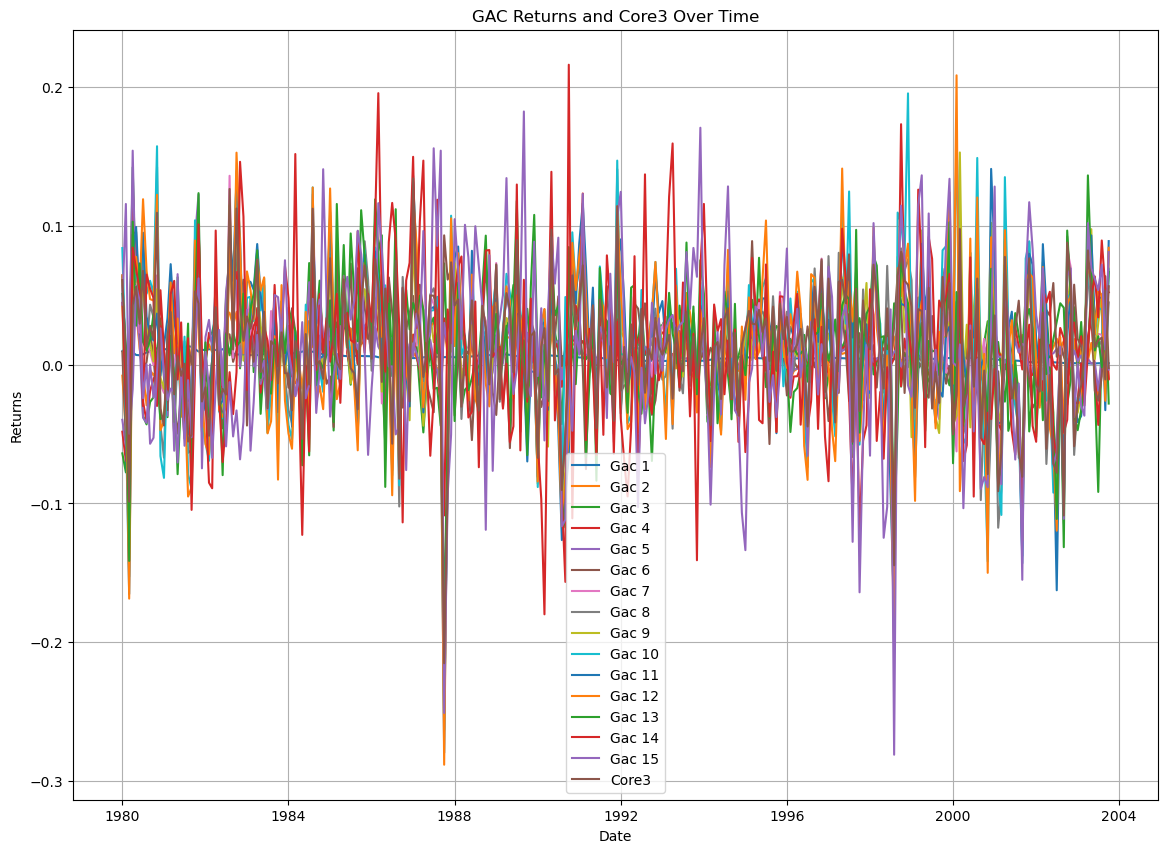

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = 'Cleaned_GACs.csv'  # Update this to the path of your CSV file

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Display the DataFrame columns to verify the structure
print("Columns in DataFrame:")
print(df.columns)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Convert GAC 1-15 and Core3 to float64
gac_columns = [f'Gac {i}' for i in range(1, 16)] + ['Core3']
for column in gac_columns:
    if column in df.columns:
        df[column] = df[column].astype('float64')

# Display the DataFrame types to verify changes
print("\nDataFrame dtypes after conversion:")
print(df.dtypes)

# Optional: Plotting to visualize the GAC columns and Core3
plt.figure(figsize=(14, 10))
for column in gac_columns:
    if column in df.columns:
        plt.plot(df.index, df[column], label=column)

plt.title('GAC Returns and Core3 Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid()
plt.show()


In [46]:
# Assuming df is your DataFrame
pd.set_option('display.max_rows', None)  # Set max rows to None to display all rows
pd.set_option('display.max_columns', None)  # Set max columns to None to display all columns

# Now print the DataFrame
print(df)

# Optional: Reset the options to defaults after printing if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

               Gac 1   Gac 2   Gac 3   Gac 4   Gac 5     Gac 6     Gac 7  \
date                                                                       
2003-10-01  0.001092 -0.0098 -0.0280 -0.0105 -0.0035 -0.002333  0.068355   
2003-09-01  0.000958  0.0217  0.0529  0.0358  0.0170  0.063833 -0.018104   
2003-08-01  0.001125  0.0018  0.0175  0.0083  0.0071 -0.008464  0.021639   
2003-07-01  0.001067 -0.0243 -0.0917 -0.0434 -0.0187 -0.025887  0.022203   
2003-06-01  0.000908 -0.0016 -0.0158 -0.0023  0.0016 -0.018812  0.007310   
2003-05-01  0.000942  0.0157  0.0570  0.0324  0.0008  0.047326  0.073614   
2003-04-01  0.001017  0.0028  0.0102  0.0200  0.0042  0.014059  0.098804   
2003-03-01  0.000992  0.0002 -0.0121  0.0004  0.0001  0.005147 -0.001230   
2003-02-01  0.001033  0.0113  0.0308  0.0205  0.0067  0.013093 -0.027242   
2003-01-01  0.001092 -0.0022 -0.0034  0.0042  0.0024  0.018652 -0.027364   
2002-12-01  0.001100  0.0185  0.0415  0.0305  0.0104  0.057709 -0.051954   
2002-11-01  

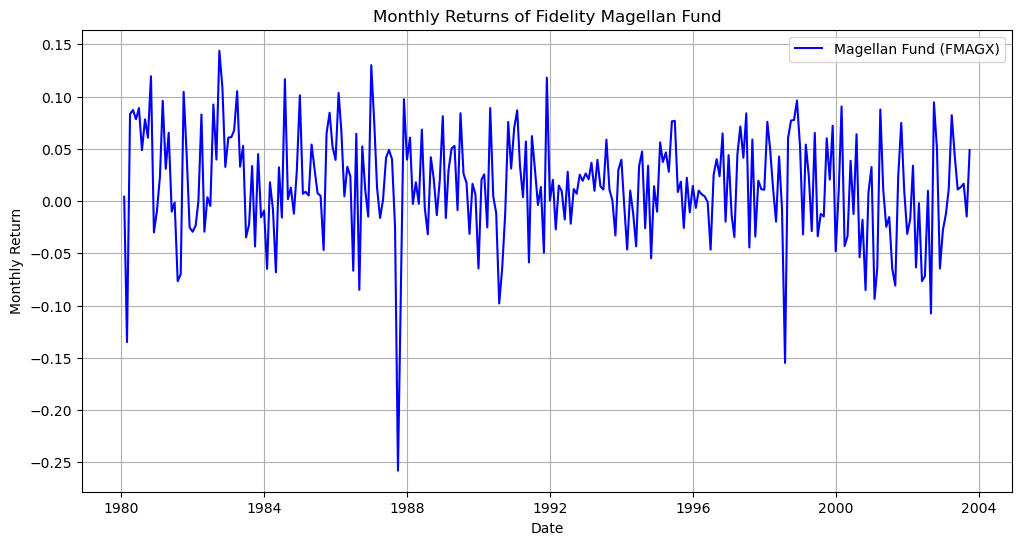

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Magellan data (make sure the file path is correct for your local environment)
magellan_data = pd.read_csv('Cleaned_FMAGX.csv', parse_dates=['date'])

# Drop any rows with missing values (if necessary)
magellan_data = magellan_data.dropna()

# Plot Magellan Fund's monthly returns
plt.figure(figsize=(12, 6))
plt.plot(magellan_data['date'], magellan_data['return'], label='Magellan Fund (FMAGX)', color='blue', linewidth=1.5)
plt.title('Monthly Returns of Fidelity Magellan Fund')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()


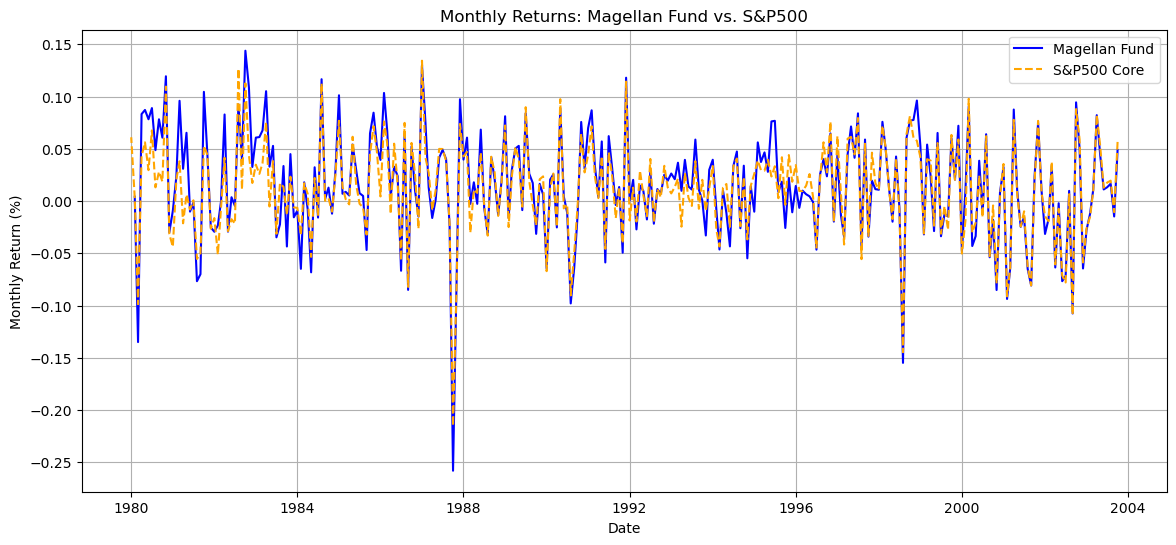

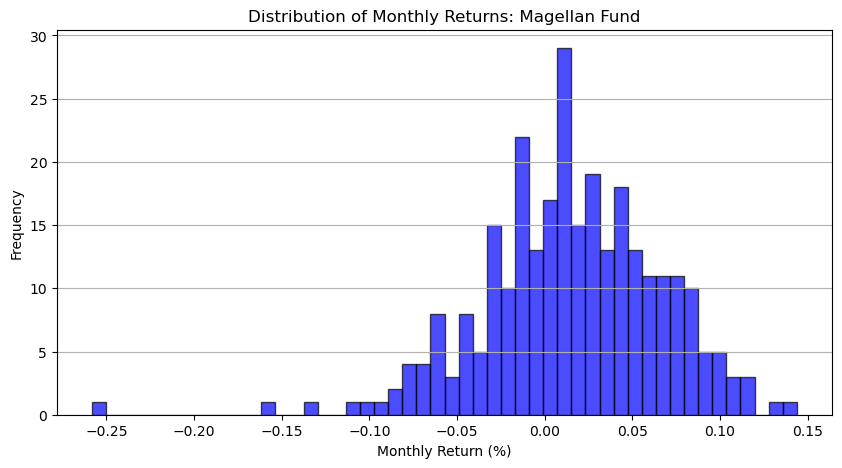

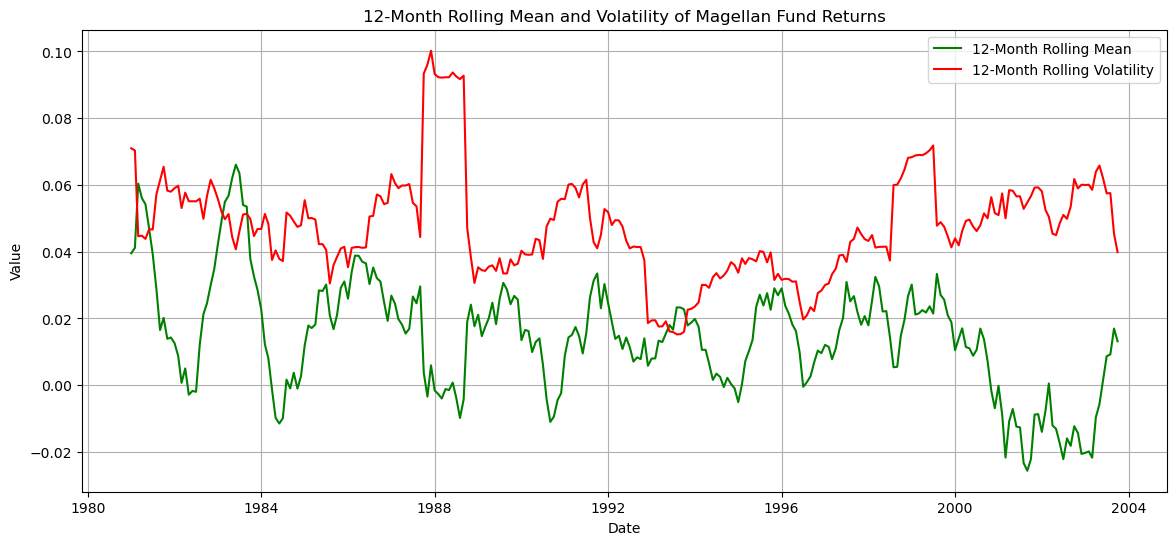

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Visualize Monthly Returns of the Magellan Fund and S&P 500
plt.figure(figsize=(14, 6))
plt.plot(fmagx_df['return'], label='Magellan Fund', color='blue')
plt.plot(gacs_df['Core3'], label='S&P500 Core', color='orange', linestyle='--')
plt.title("Monthly Returns: Magellan Fund vs. S&P500")
plt.xlabel("Date")
plt.ylabel("Monthly Return (%)")
plt.legend()
plt.grid(True)
plt.show()

# Histogram of Monthly Returns for Magellan Fund
plt.figure(figsize=(10, 5))
plt.hist(fmagx_df['return'].dropna(), bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Monthly Returns: Magellan Fund")
plt.xlabel("Monthly Return (%)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# Optional: Rolling Mean and Volatility (e.g., 12-month rolling window)
fmagx_df['rolling_mean'] = fmagx_df['return'].rolling(window=12).mean()
fmagx_df['rolling_vol'] = fmagx_df['return'].rolling(window=12).std()

plt.figure(figsize=(14, 6))
plt.plot(fmagx_df['rolling_mean'], label='12-Month Rolling Mean', color='green')
plt.plot(fmagx_df['rolling_vol'], label='12-Month Rolling Volatility', color='red')
plt.title("12-Month Rolling Mean and Volatility of Magellan Fund Returns")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


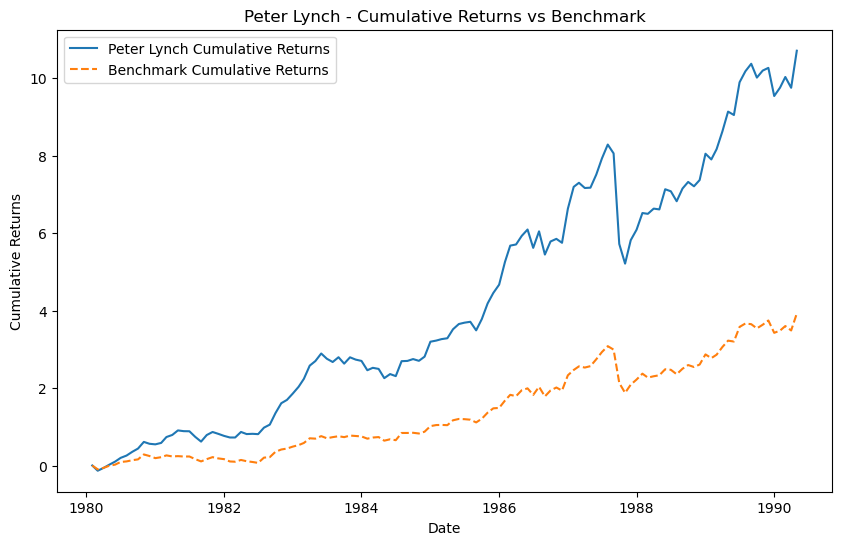

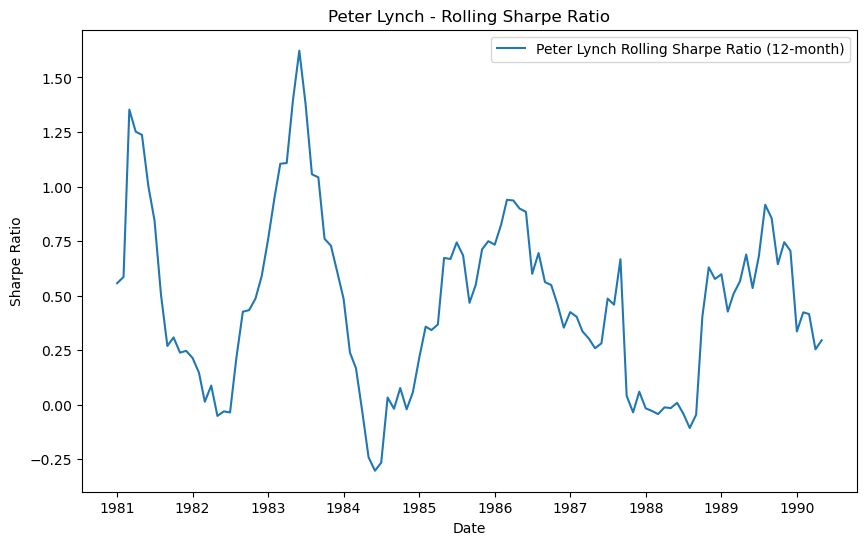

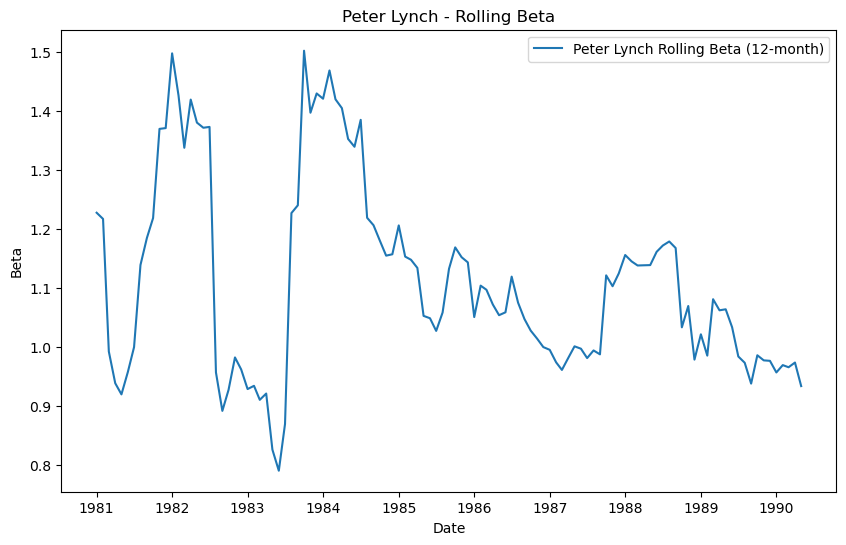

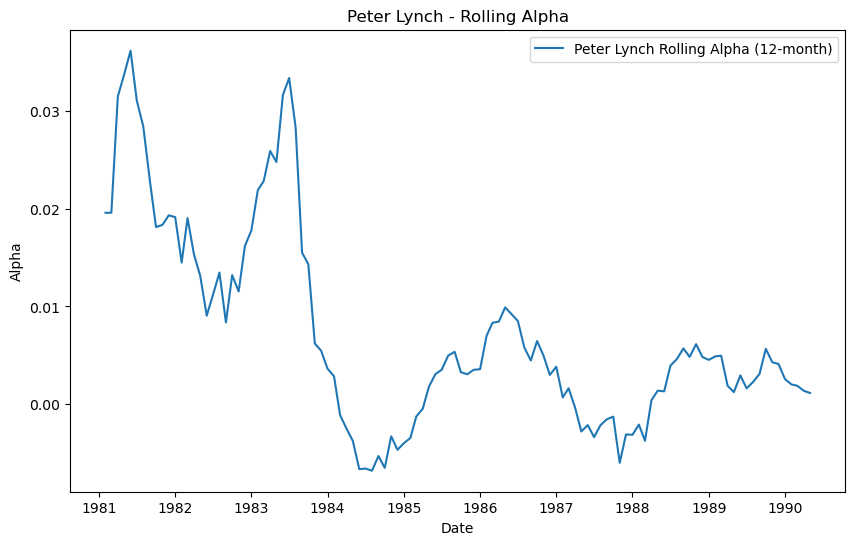

Peter Lynch metrics:
mean_return: 0.0217
volatility: 0.0568
sharpe_ratio: 0.1337
alpha: 1.1120
beta: 0.0060
utility: 0.0168




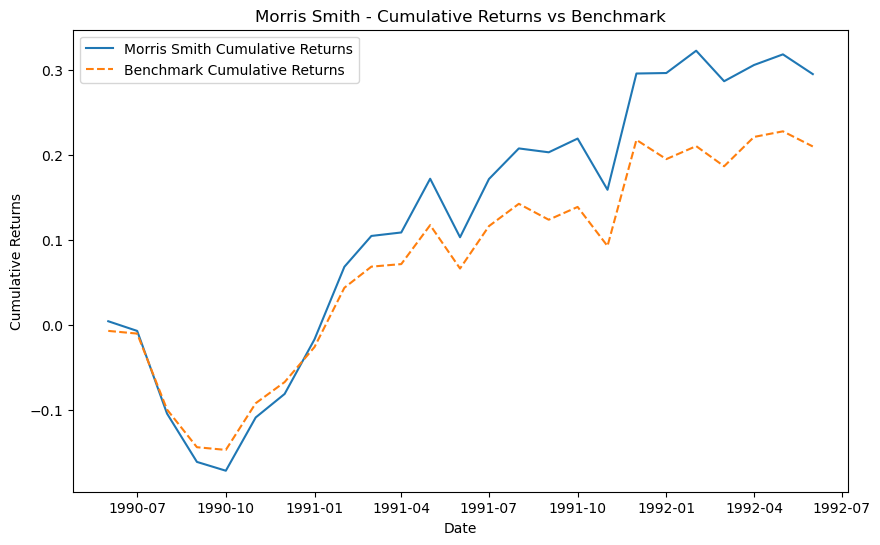

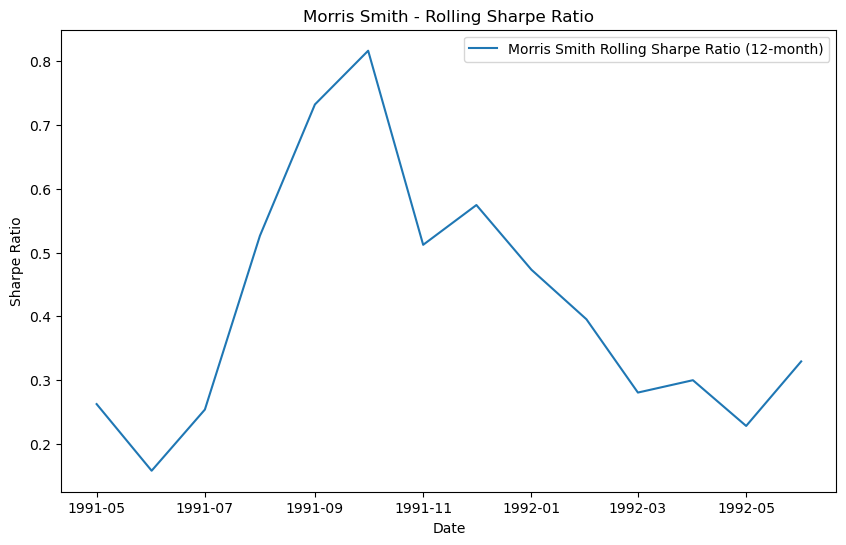

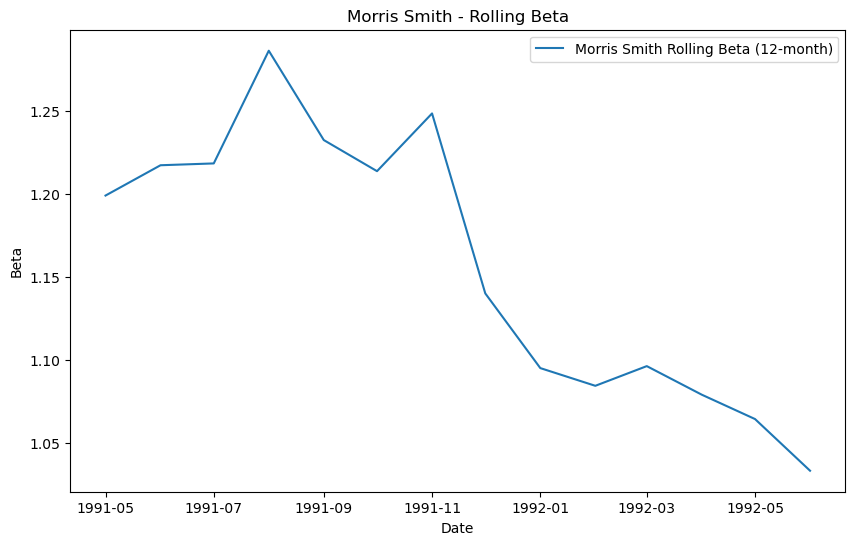

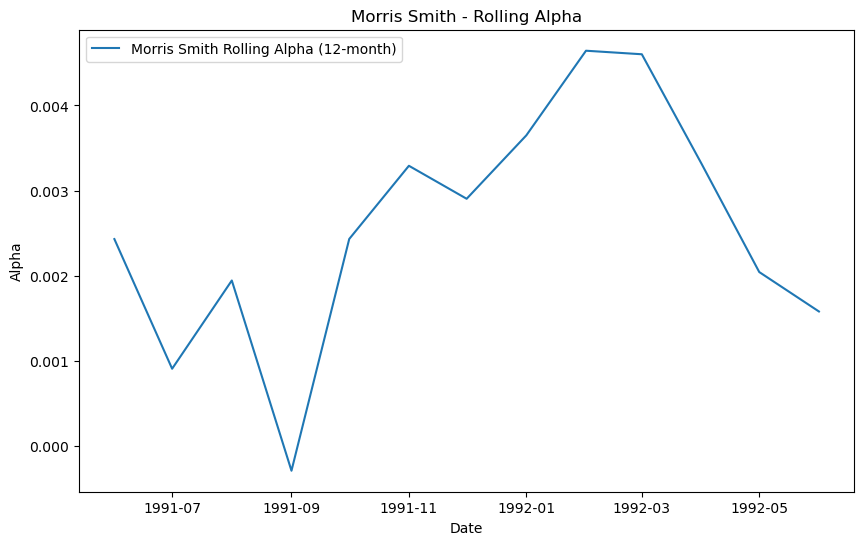

Morris Smith metrics:
mean_return: 0.0116
volatility: 0.0503
sharpe_ratio: 0.0607
alpha: 1.1380
beta: 0.0019
utility: 0.0078




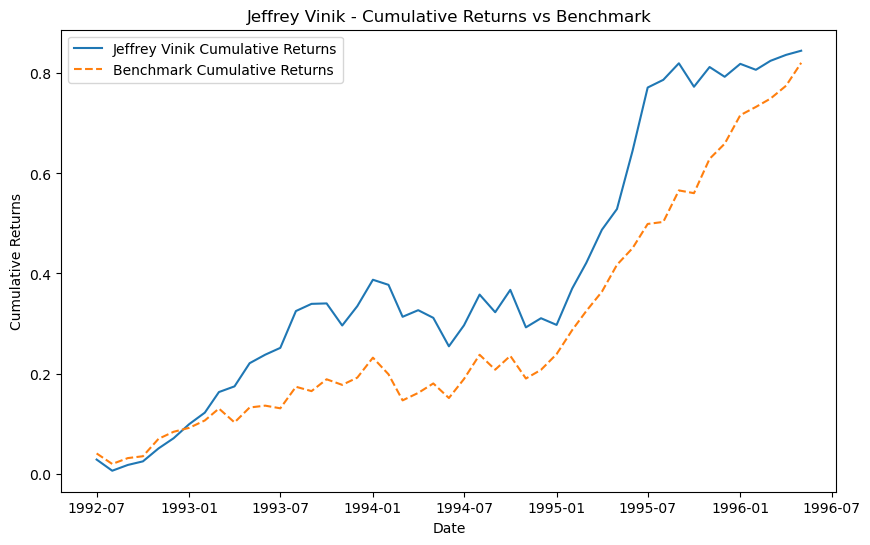

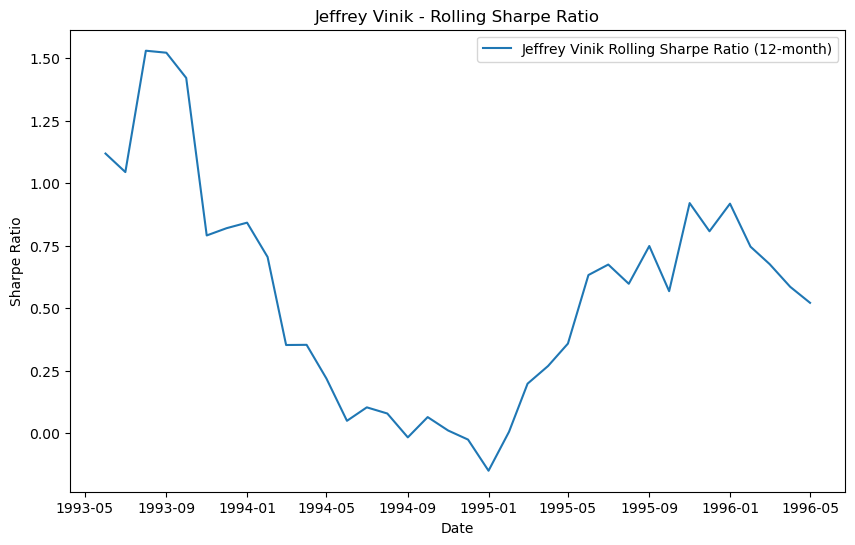

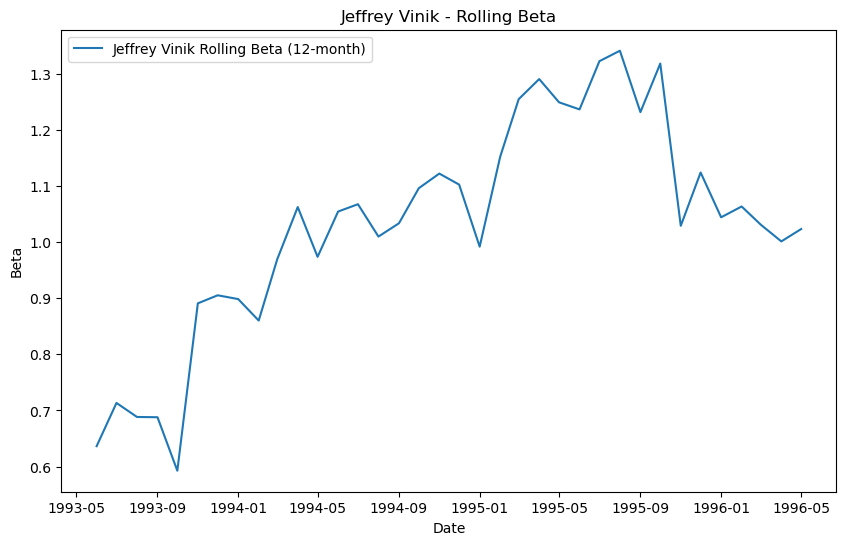

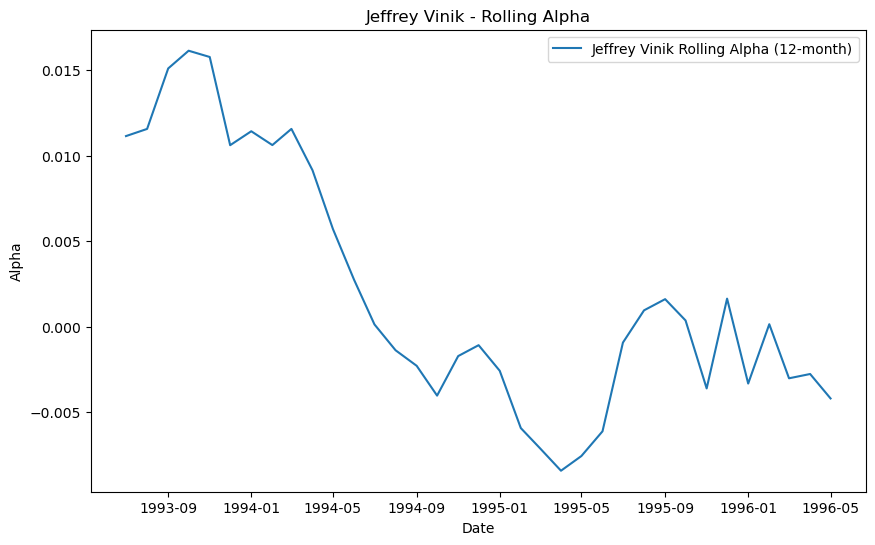

Jeffrey Vinik metrics:
mean_return: 0.0135
volatility: 0.0293
sharpe_ratio: 0.0155
alpha: 0.9823
beta: 0.0007
utility: 0.0122




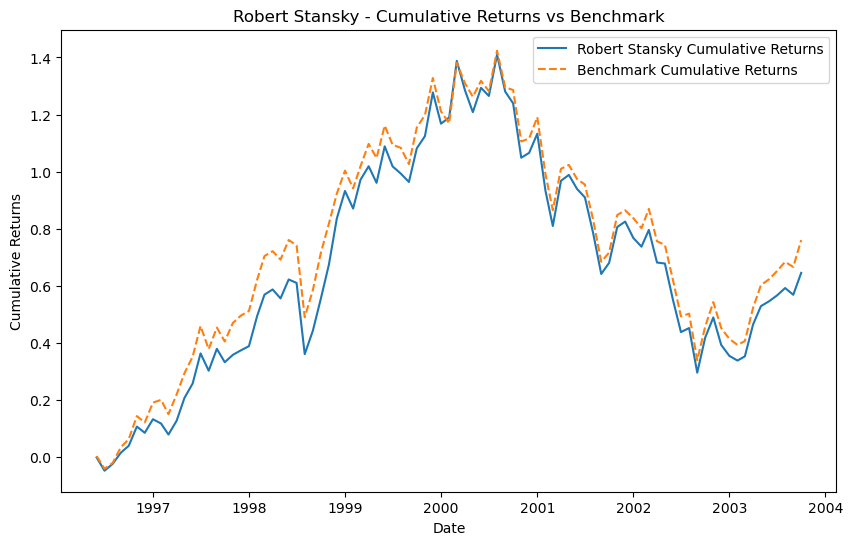

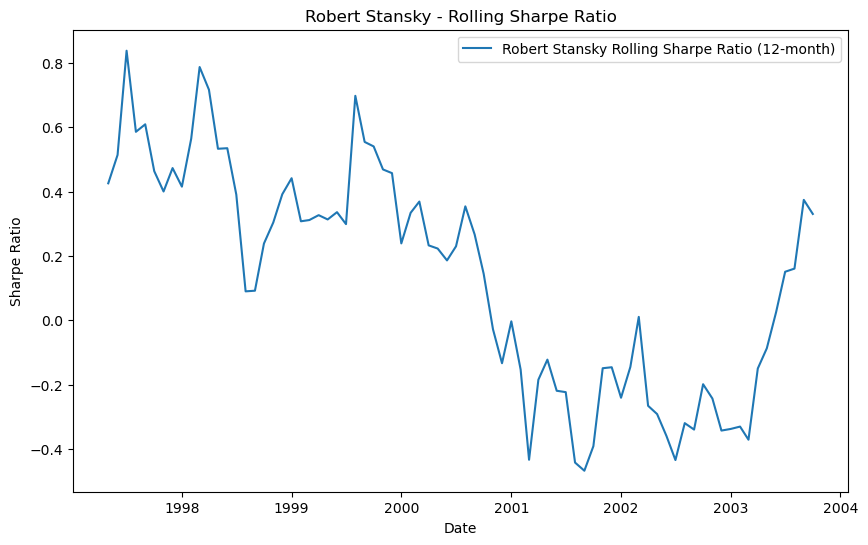

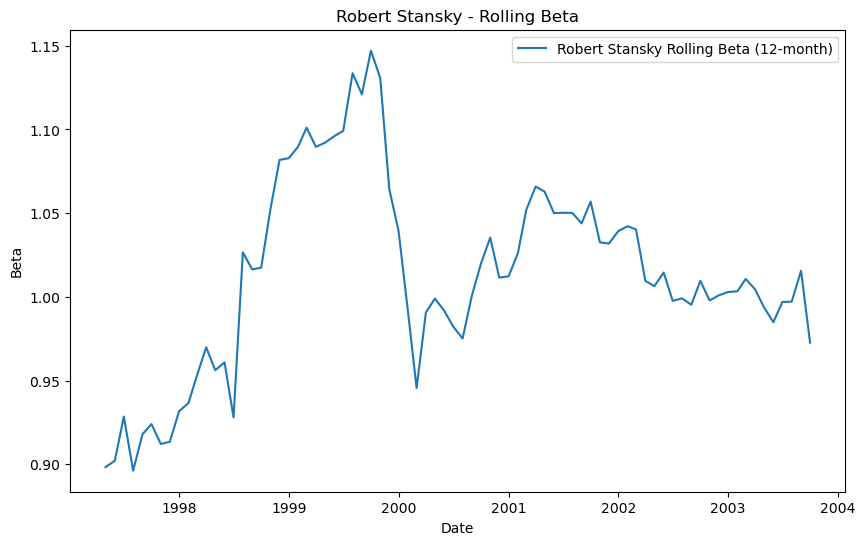

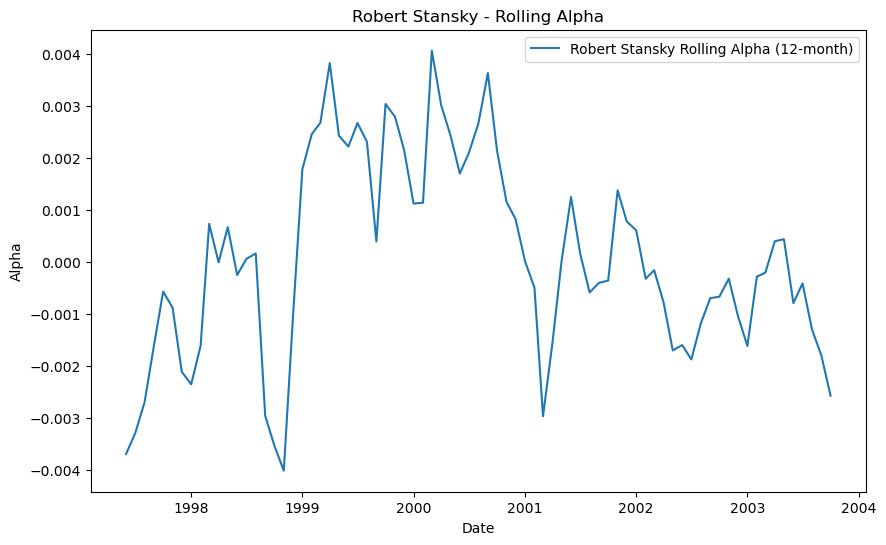

Robert Stansky metrics:
mean_return: 0.0070
volatility: 0.0524
sharpe_ratio: -0.0132
alpha: 1.0094
beta: -0.0008
utility: 0.0029




In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sort dataframes by date (assuming `fmagx_df` and `gacs_df` are already cleaned and sorted)
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns (Core3 from GACs)
benchmark_returns = gacs_df['Core3']

# Analysis Functions
def calculate_metrics(returns, benchmark):
    metrics = {}
    excess_returns = returns - benchmark.mean()
    
    # Mean return and volatility
    metrics['mean_return'] = returns.mean()
    metrics['volatility'] = returns.std()
    
    # Sharpe ratio
    metrics['sharpe_ratio'] = excess_returns.mean() / returns.std()
    
    # Alpha and beta
    metrics['alpha'], metrics['beta'] = stats.linregress(benchmark, returns)[:2]
    
    # Utility function with a risk aversion coefficient (assumed 3 here)
    risk_aversion = 3
    metrics['utility'] = returns.mean() - 0.5 * risk_aversion * returns.var()
    
    return metrics

# Rolling regression function to calculate rolling alpha and beta
def rolling_alpha_beta(returns, benchmark, window=12):
    rolling_alpha = []
    rolling_beta = []
    
    for i in range(window, len(returns)):
        y = returns[i-window:i]
        x = benchmark[i-window:i]
        if len(x) > 1:  # Ensure there is enough data
            beta, alpha, _, _, _ = stats.linregress(x, y)
            rolling_alpha.append(alpha)
            rolling_beta.append(beta)
        else:
            rolling_alpha.append(np.nan)
            rolling_beta.append(np.nan)
    
    # Pad with NaNs for alignment with original index
    return pd.Series(rolling_alpha, index=returns.index[window:]), pd.Series(rolling_beta, index=returns.index[window:])

# Calculate and visualize metrics for each manager
manager_metrics = {}
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = benchmark_returns.loc[start:end]
    metrics = calculate_metrics(returns, benchmark)
    manager_metrics[manager] = metrics

    # Cumulative returns
    cumulative_returns = (1 + returns).cumprod() - 1
    cumulative_benchmark = (1 + benchmark).cumprod() - 1

    # Plot cumulative returns
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns, label=f"{manager} Cumulative Returns")
    plt.plot(cumulative_benchmark, label="Benchmark Cumulative Returns", linestyle="--")
    plt.title(f"{manager} - Cumulative Returns vs Benchmark")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.show()
    
    # Plot rolling Sharpe ratio
    rolling_sharpe = (returns.rolling(window=12).mean() / returns.rolling(window=12).std()).dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_sharpe, label=f"{manager} Rolling Sharpe Ratio (12-month)")
    plt.title(f"{manager} - Rolling Sharpe Ratio")
    plt.xlabel("Date")
    plt.ylabel("Sharpe Ratio")
    plt.legend()
    plt.show()

    # Plot rolling beta
    rolling_beta = returns.rolling(window=12).cov(benchmark) / benchmark.rolling(window=12).var()
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_beta, label=f"{manager} Rolling Beta (12-month)")
    plt.title(f"{manager} - Rolling Beta")
    plt.xlabel("Date")
    plt.ylabel("Beta")
    plt.legend()
    plt.show()

    # Calculate and plot rolling alpha
    rolling_alpha, rolling_beta = rolling_alpha_beta(returns, benchmark, window=12)
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_alpha, label=f"{manager} Rolling Alpha (12-month)")
    plt.title(f"{manager} - Rolling Alpha")
    plt.xlabel("Date")
    plt.ylabel("Alpha")
    plt.legend()
    plt.show()

    # Print metrics
    print(f"{manager} metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")


In [42]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assuming gacs_df is already created as per your previous instructions
# Here's an example structure for fmagx_df
# For demonstration, we will create it with dummy return data
# Replace this with the actual return data you want to analyze

# Sample Magellan Fund returns (you should replace this with your actual data)
magellan_data = {
    'date': pd.date_range(start='1980-02-01', end='2003-10-01', freq='M'),
    'return': np.random.normal(loc=0.01, scale=0.05, size=283)  # Dummy returns
}

# Create the Magellan DataFrame
fmagx_df = pd.DataFrame(magellan_data).set_index('date')

# Ensure the gacs_df DataFrame is properly defined (as in the previous steps)
# Here is an example structure for gacs_df based on the data you provided earlier
gacs_data = {
    'date': pd.date_range(start='2003-10-01', periods=10, freq='M'),  # Adjust according to your data
    'Core3': np.random.normal(loc=0.005, scale=0.02, size=10)  # Dummy benchmark data
}
gacs_df = pd.DataFrame(gacs_data).set_index('date')

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns (e.g., S&P 500 core from GACs)
benchmark_returns = gacs_df['Core3']

# Analysis Functions
def calculate_metrics(returns, benchmark):
    metrics = {}
    excess_returns = returns - benchmark.mean()
    metrics['mean_return'] = returns.mean()
    metrics['volatility'] = returns.std()
    metrics['sharpe_ratio'] = returns.mean() / returns.std() if returns.std() != 0 else np.nan
    metrics['information_ratio'] = metrics['mean_return'] / metrics['volatility'] if metrics['volatility'] != 0 else np.nan
    metrics['alpha'], metrics['beta'] = stats.linregress(benchmark, returns)[:2]
    return metrics

# Loop through managers
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = benchmark_returns.loc[start:end]
    metrics = calculate_metrics(returns, benchmark)
    print(f"{manager} metrics:", metrics)

    # Perform a t-test
    t_stat, p_value = stats.ttest_1samp(returns, benchmark.mean())
    print(f"{manager} t-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

    # Plot the returns of the manager vs the benchmark
    plt.figure(figsize=(12, 6))
    plt.plot(returns.index, returns, label=f'{manager} Returns', color='blue')
    plt.plot(benchmark.index, benchmark, label='Benchmark Returns (Core3)', color='orange')
    plt.title(f'{manager} Returns vs Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.grid()
    plt.show()


/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_67876/4266682492.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='1980-02-01', end='2003-10-01', freq='M'),


ValueError: All arrays must be of the same length

In [41]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.api import OLS

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns (e.g., S&P 500 core from GACs)
benchmark_returns = gacs_df['Core3']

# Analysis Functions
def calculate_metrics(returns, benchmark):
    metrics = {}
    excess_returns = returns - benchmark.mean()
    metrics['mean_return'] = returns.mean()
    metrics['volatility'] = returns.std()
    metrics['sharpe_ratio'] = returns.mean() / returns.std()
    metrics['alpha'], metrics['beta'] = stats.linregress(benchmark, returns)[:2]
    return metrics



# Loop through managers
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = benchmark_returns.loc[start:end]
    metrics = calculate_metrics(returns, benchmark)
    print(f"{manager} metrics:", metrics)


KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'